Extracting /root/PycharmProjects/test/MNIST_data/train-images-idx3-ubyte.gz


Extracting /root/PycharmProjects/test/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /root/PycharmProjects/test/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /root/PycharmProjects/test/MNIST_data/t10k-labels-idx1-ubyte.gz


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


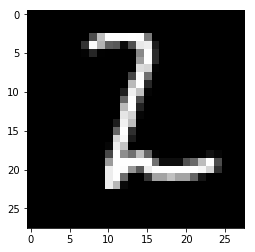

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


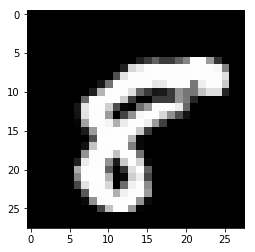

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


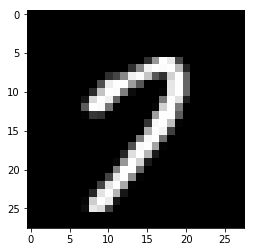

0.3043


In [ ]:
# ImportError: No module named input_data
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image
# Just disables the warning, doesn't enable AVX/FMA
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


def show_bmp(im_arr):
    im = np.array(im_arr)
    im = im.reshape(28, 28)

    fig = plt.figure()
    plotwindow = fig.add_subplot(111)
    plt.imshow(im, cmap='gray')
    plt.show()
    

mnist = input_data.read_data_sets('/root/PycharmProjects/test/MNIST_data', one_hot=True)

x = tf.placeholder("float", [None, 784])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)

y_ = tf.placeholder("float", [None, 10])
# 计算交叉熵:
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))

train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
for i in range(3):
    batch_xs, batch_ys = mnist.train.next_batch(100)

    print(batch_ys[0])  # 显示标签
    show_bmp(batch_xs[0])  # 显示图片

    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
# 最后，我们计算所学习到的模型在测试数据集上面的正确率。
print('正确率', sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

sess.close()
